<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Walkthrough of Standard EDA Procedure

_Authors: Kiefer Katovich (SF), Minor updates by David Yerrington (SF)_

---

This lesson uses a boston housing market dataset to walk through a basic exploratory data analysis procedure, starting from the very beginning with loading the data. 

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would go through when taking a look at a new dataset.

Note: this lesson is strictly exploratory. We will not be formulating any hypotheses about the data or testing them. In many cases you may have formulated a hypothesis before even looking at your data, which could considerably affect your focus and choices in what to investigate.


### Learning Objectives

- Quickly describe a dataset, including data types, missing values and basic descriptive statistics
- Rename columns (series) in a dataframe
- Visualize data distributions with boxplots
- Standardize variables and explain why this is often a useful thing to do
- Calculate and visualize correlation

### Lesson Guide

- [Description of the Boston Housing Data](#data_description)
- [Loading the data](#load_data)
- [Drop unwanted columns](#drop)
- [Clean corrupted data](#clean)
- [Count null values and drop rows](#drop_nulls)
- [Rename columns](#rename)
- [Investigate potential outliers with boxplots](#boxplots)
- [Plot all variables together](#plot_all)
- [Standardization of variables](#standardization)
- [Plot the standardized variables together](#plot_all_rescaled)
- [Look at the correlation between variables](#cov_cor)


<a id='data_description'></a>

### Description of the Boston Housing Data columns

---

The columns of the dataset are coded. The corresponding descriptions are:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of African-American residents by town
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    
Each row in the dataset represents a different suburb of Boston.

These descriptions of shortened or coded variables are often called "codebooks" or data dictionaries. They are typically found with datasets you might find online in a separate file.


**Load packages:**

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='load_data'></a>

### 1. Load the data

---

Import the csv into a pandas DataFrame.

In [2]:
boston_file = './datasets/housing.csv'

In [8]:
# A:
boston = pd.read_csv(boston_file)
boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<a id='header'></a>

### 2. Describe the basic format of the data and the columns

---

Use the `.head()` function (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like. This is a good initial step to get a feel for what is in the csv and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [9]:
# Print out the first 8 rows:
boston.head(8)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,396.90,5.33,36.2
5,5,0.02985,0.0,2.18,0,0.458,6.430,58.7,"6,0622",3,222,18.7,394.12,5.21,28.7
6,6,0.08829,12.5,7.87,0,0.524,6.012,66.6,"5,5605",5,311,15.2,395.60,12.43,22.9
7,7,0.14455,12.5,7.87,0,0.524,6.172,96.1,"5,9505",5,311,15.2,396.90,19.15,27.1


In [11]:
# Look at the dtypes of the columns:
boston.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS            int64
NOX           float64
RM            float64
AGE           float64
DIS            object
RAD            object
TAX             int64
PTRATIO       float64
B             float64
LSTAT         float64
MEDV          float64
dtype: object

In [13]:
#boston.info()
boston.index.values[:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

<a id='drop'></a>

### 2. Drop unwanted columns

---

There is a column labeled `Unnamed: 0` which appears to simply number the rows. We already have the number id of the rows in the DataFrame's index and so we don't need this column.

The `.drop()` built-in function can be used to get rid of a column. When removing a column, we need to specify `axis=1` to the function.

For the record, the `.index` attribute holds the row indices. This is the the sister attribute to the `.columns` attribute that we work with more often.



In [14]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
boston.columns[0]

'Unnamed: 0'

In [17]:
# Remove the unneccesary column:
boston.drop(boston.columns[0], axis=1, inplace=True)
# or
# boston.drop('Unnamed: 0', axis=1, inplace=True)

<a id='clean'></a>

### 3. Clean corrupted columns

---

You may have noticed when we examined the `dtypes` attribute that two of the columns were of type "object", indicating that they were string. However, we know from the data description above (and we can infer from the header of the data) that `DIS` and `RAD` should in fact be numeric.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

**3.A What is causing the `DIS` column to be encoded as a string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip: The `.map()` built-in function on a column will apply a function to each element of the column.*

In [23]:
# A:k
#boston['DIS'] = boston['DIS']map(lambda x: x.replace(',','.'))
boston['DIS'] = boston['DIS'].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

**3.B What is causing the `RAD` column to be encoded as string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip: You can put `np.nan` values in place of corrupted observations, which are numeric "Null" values.*

In [26]:
# A:
boston['RAD'].unique()
type(np.nan)

float

In [34]:
boston['RAD'] = boston['RAD'].map(lambda x: np.nan if x=='?' else float(x))
boston['RAD'].dtype
boston['RAD'].value_counts(dropna=False)

 24.0    123
 5.0     107
 4.0     101
NaN       40
 3.0      35
 6.0      25
 8.0      21
 2.0      21
 1.0      18
 7.0      15
Name: RAD, dtype: int64

In [35]:
boston.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD        40
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

<a id='drop_nulls'></a>

### 4. Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `RAD` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing and for which columns.

A handy way to look at how many null values there are per column with pandas is:

```python
boston.isnull().sum()
```

The `.isull()` built-in function will convert the columns to boolean `True` and `False` values (returning a new dataframe) where null values are indicated by `True`. 

The `.sum()` function tacked on to the back of that will then sum these boolean columns, and the total number of null values per column will be returned.

In [42]:
# A


0

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values. In this case, we will just drop the rows.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

In [ ]:
# A:
boston.dropna(inplace=True) # axis is 0 by default and 'how' is 'any' by default
boston.shape
boston.isnull().sum().sum()

<a id='rename'></a>

### 5. Make the column names more descriptive

---

Often it is annoying to have to memorize what the codes mean for columns, or reference the codebook whenever I want to know the meaning of a variable. It often makes sense to rename columns that are not descriptive.

There is more than one way to do this, but one easy way is to use the `.rename()` function.

Here are the column names and their descriptions again for reference:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of African-American residents by town
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    

In [ ]:
# A:

There two popular methods to rename dataframe columns.
1. Using a _dictionary substitution_, which is very useful if you only want to rename a few of the columns. This method uses the `.rename()` function.
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names.

In [46]:
# Dictionary Method
boston.rename(columns={
        'CRIM':'rate of crime',
        'ZN':'residential zone pct',
        'INDUS':'business zone pct',
        'CHAS':'borders river',
        'NOX':'oxide concentration',
        'RM':'average rooms',
        'AGE':'owner occup pct',
        'DIS':'dist to work',
        'RAD':'access to highway',
        'TAX':'property tax',
        'PTRATIO':'student teacher ratio',
        'B':'black stat',
        'LSTAT':'pct underclass',
        'MEDV':'home median value'
    }, inplace=True)
boston.head()

,rate of crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [ ]:
# List Replacement Method
boston.columns = ['rate_of_crime', 'residential_zone_pct', 'business_zone_pct',
       'borders_river', 'oxide_concentration', 'average_rooms',
       'owner_occup_pct', 'dist_to_work', 'access_to_highway', 'property_tax',
       'student_teacher_ratio', 'aa_stat', 'pct_underclass',
       'home_median_value']

<a id='describe'></a>

### 6. Describe the summary statistics for the columns

<img src="https://snag.gy/07JFa5.jpg" width="350">

---

The `.describe()` function gives summary statistics for each of your variables. What are some, if any, oddities you notice about the variables based on this output?

In [48]:
# A:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
rate of crime,466.0,3.326334,7.095767,0.00632,0.083235,0.256355,3.689387,73.5341
residential_zone_pct,466.0,11.154506,22.731621,0.00000,0.000000,0.000000,12.500000,100.0000
business_zone_pct,466.0,11.144292,6.820913,0.74000,5.190000,9.690000,18.100000,27.7400
borders_river,466.0,0.075107,0.263848,0.00000,0.000000,0.000000,0.000000,1.0000
oxide_concentration,466.0,0.555840,0.116818,0.38900,0.450000,0.538000,0.624000,0.8710
average_rooms,466.0,6.272489,0.696995,3.56100,5.884250,6.189000,6.618750,8.7800
owner_occup_pct,466.0,68.504506,28.023878,6.00000,45.450000,77.150000,93.975000,100.0000
dist_to_work,466.0,3.811963,2.123668,1.12960,2.101425,3.207450,5.213925,12.1265
access_to_highway,466.0,9.611588,8.735627,1.00000,4.000000,5.000000,24.000000,24.0000
property_tax,466.0,410.049356,168.921219,187.00000,280.250000,330.000000,666.000000,711.0000


<a id='boxplots'></a>

### 7. Plot variables with potential outliers using boxplots.

---

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.

_If you want to check out more, place your cursor in the `boxplot` argument bracket and press `shift+tab` (Press four times repeatedly to bring up detailed documentation)._
    

/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


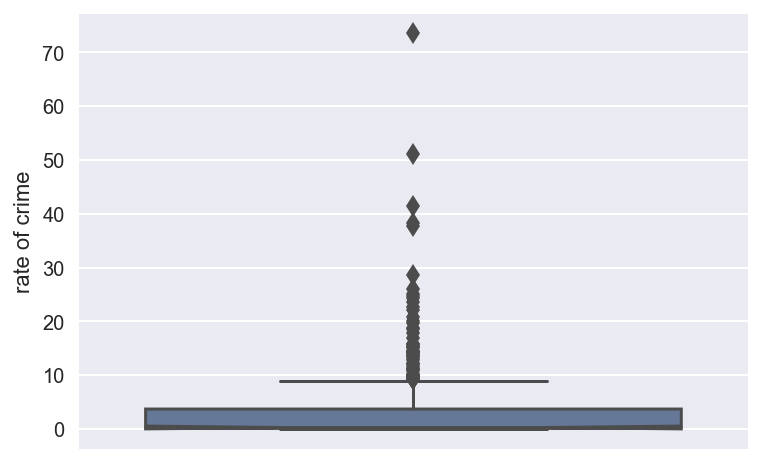

In [49]:
# rate of crime
sns.boxplot(boston['rate of crime'],
            orient='v',
            fliersize=8,
            linewidth=1.5,
            notch=True,
            saturation=.5)

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


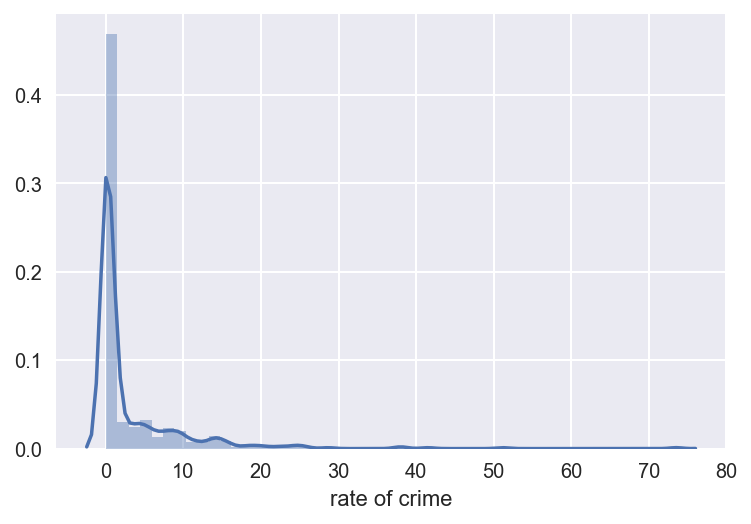

In [53]:
sns.distplot(boston['rate of crime'])

/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


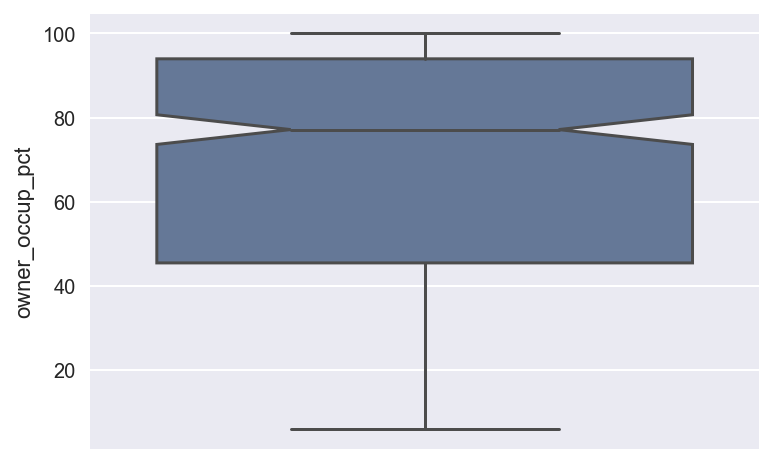

In [52]:
# percent owner occupied
sns.boxplot(boston['owner_occup_pct'],
            orient='v',
            fliersize=8,
            linewidth=1.5,
            notch=True,
            saturation=.5)

/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Business Zoning Distribution')

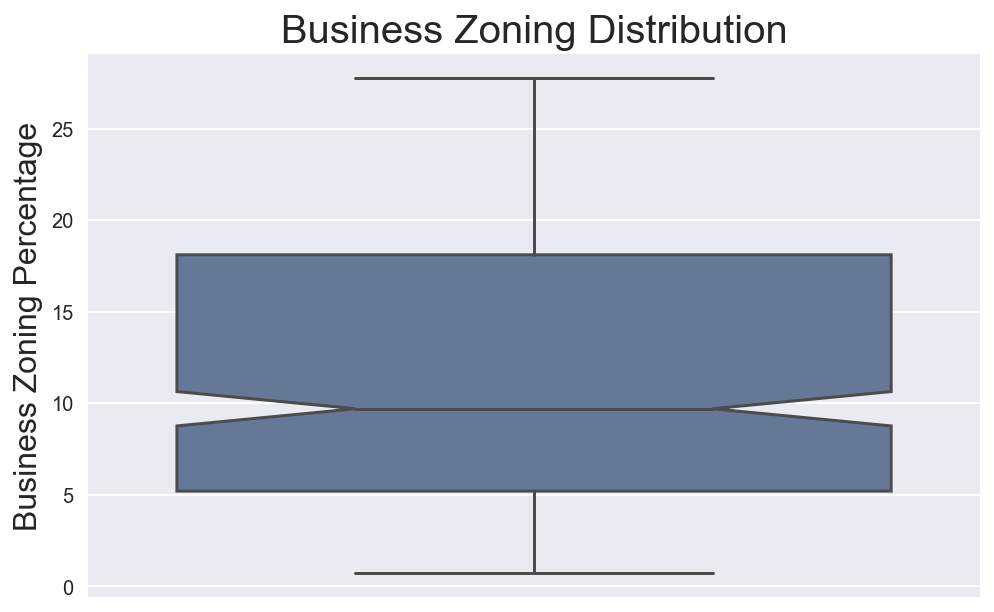

In [62]:
# business zone percent
fig = plt.figure(figsize=(8, 5))
ax = fig.gca()# gca = get current axis

sns.boxplot(boston['business_zone_pct'],
            orient='v',
            fliersize=8,
            linewidth=1.5,
            notch=True,
            saturation=.5,
            ax = ax)
ax.set_ylabel('Business Zoning Percentage', fontsize = 16)
ax.set_title('Business Zoning Distribution', fontsize = 20)

<a id='plot_all'></a>

### 8. Plot all the variables on boxplots together.

---

Plot all the variables using using a horizontal boxplot with seaborn. What is wrong with this plot, if anything?

/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'All variables boxplot\n')

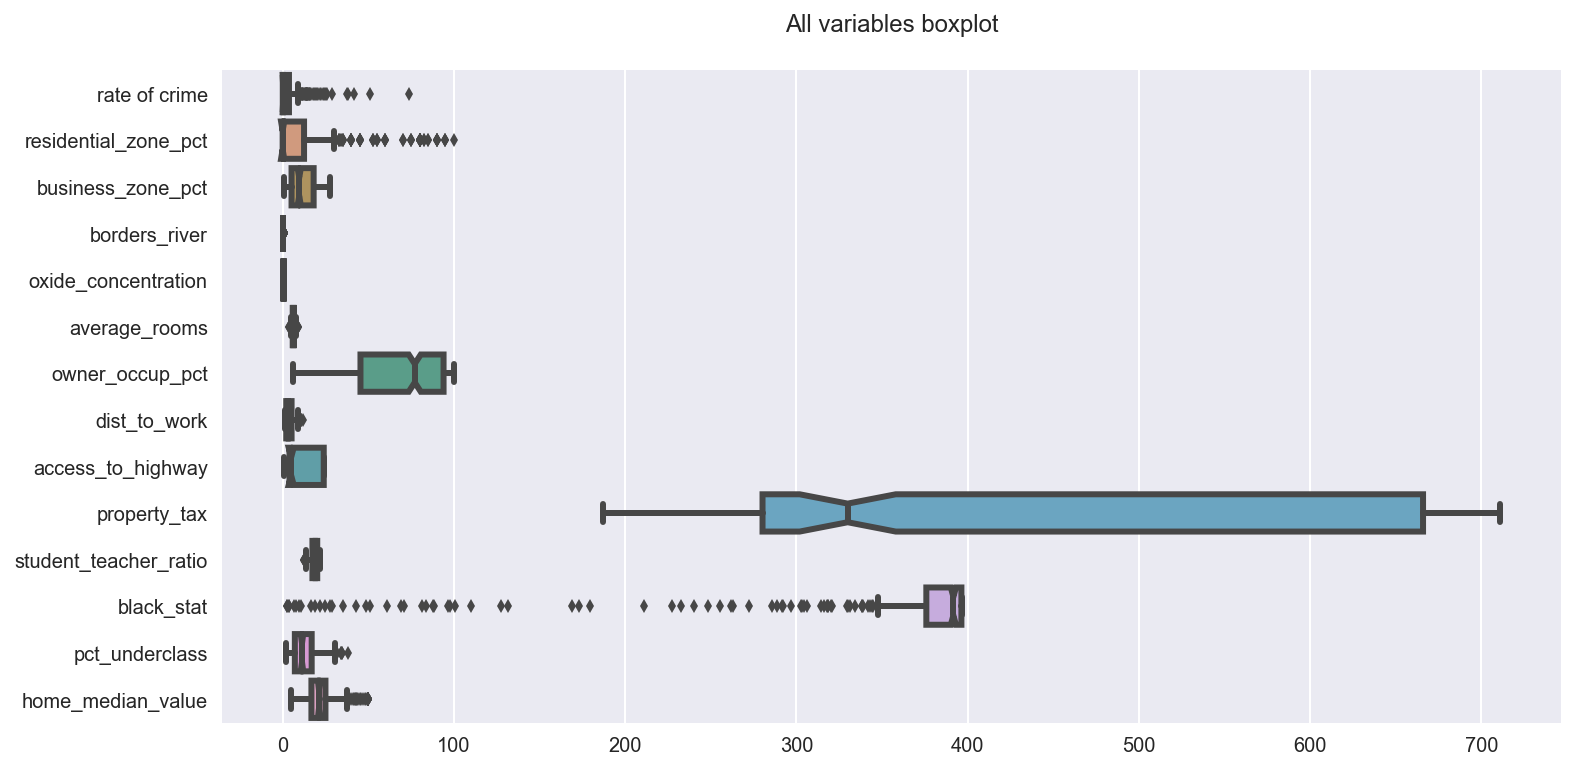

In [63]:
# A:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=boston, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')


<a id='standardization'></a>

### 9. Standardizing variables

> We haven't talked about this just yet because it actually is most impactful with regards to modeling, but as a precursor to modeling (the process of predicting on a target variable, using predictor variables), this will be incredibly useful to have some context to how this works.

---

Rescaling variables is very common, and sometimes essential. For example, when we get to regularization of models the rescaling procedure becomes a requirement before fitting the model.

Here we'll rescale the variables using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

Standardization is not complicated:

    standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
Note: Nothing else is changed about the distribution of the variable. It doesn't become normally distributed.

#### Question:  Any reasons you might think this step could be important?

**9.A Pull out rate of crime and plot the distribution.**

Also print out the mean and standard deviation of the original variable.

In [ ]:
# A:


**9.B Standardize the rate_of_crime variable. Notice the new mean is centered at 0.**

In [ ]:
# A:

**9.C Plot the original and standardized rate of crime. Notice that nothing changes about the distribution except for the location and the scale.**

In [ ]:
# A:


<a id='plot_all_rescaled'></a>

### 10. Standardize all of the columns and re-create the boxplot

---

Pandas DataFrames make it extremely easy to standardize the columns all at once. You can standardize the data like so:

```python
boston_stand = (boston - boston.mean()) / boston.std()
```

Create a standardized version of the data and recreate the boxplot. Now you can better examine the differences in the shape of distributions across our variables.

In [ ]:
# A:


<a id='cov_cor'></a>

### 11. Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the correlation between two variables $X$ and $Y$:

#### 11.A Correlation

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

Calculate the correlation between `pct_under` and `med_value` using `np.corrcoef()`:


In [64]:
# A: correlation is always between -1 and 1
pct_under = boston['pct_underclass'].values
med_val = boston['home_median_value'].values

np.corrcoef(pct_under, med_val)

array([[ 1.        , -0.73369677],
       [-0.73369677,  1.        ]])

#### 11.C The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [65]:
# A:

boston.corr()

,rate of crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
rate of crime,1.000000,-0.224533,0.453573,-0.059286,0.454794,-0.259346,0.385813,-0.413295,0.686361,0.638655,0.318062,-0.459357,0.488930,-0.402687
residential_zone_pct,-0.224533,1.000000,-0.534804,-0.043174,-0.511765,0.312325,-0.564412,0.669798,-0.317120,-0.313394,-0.386644,0.176412,-0.414598,0.357747
business_zone_pct,0.453573,-0.534804,1.000000,0.065866,0.760027,-0.404952,0.635092,-0.707574,0.605772,0.738231,0.387690,-0.350904,0.611393,-0.490163
borders_river,-0.059286,-0.043174,0.065866,1.000000,0.091785,0.101140,0.091571,-0.105081,-0.009709,-0.040180,-0.127876,0.047467,-0.056845,0.188416
oxide_concentration,0.454794,-0.511765,0.760027,0.091785,1.000000,-0.305690,0.728478,-0.765810,0.598606,0.656462,0.163856,-0.365326,0.590495,-0.420656
average_rooms,-0.259346,0.312325,-0.404952,0.101140,-0.305690,1.000000,-0.238659,0.217564,-0.214301,-0.298968,-0.355091,0.133237,-0.615721,0.690857
owner_occup_pct,0.385813,-0.564412,0.635092,0.091571,0.728478,-0.238659,1.000000,-0.743785,0.452948,0.505761,0.247303,-0.264797,0.599298,-0.374378
dist_to_work,-0.413295,0.669798,-0.707574,-0.105081,-0.765810,0.217564,-0.743785,1.000000,-0.492243,-0.534064,-0.215449,0.287883,-0.504725,0.250866
access_to_highway,0.686361,-0.317120,0.605772,-0.009709,0.598606,-0.214301,0.452948,-0.492243,1.000000,0.908304,0.468876,-0.424444,0.480370,-0.370843
property_tax,0.638655,-0.313394,0.738231,-0.040180,0.656462,-0.298968,0.505761,-0.534064,0.908304,1.000000,0.465972,-0.424072,0.543232,-0.462720


**Seaborn also has a great way of showing this to us visually, if colors stick out to you more than decimal values.**

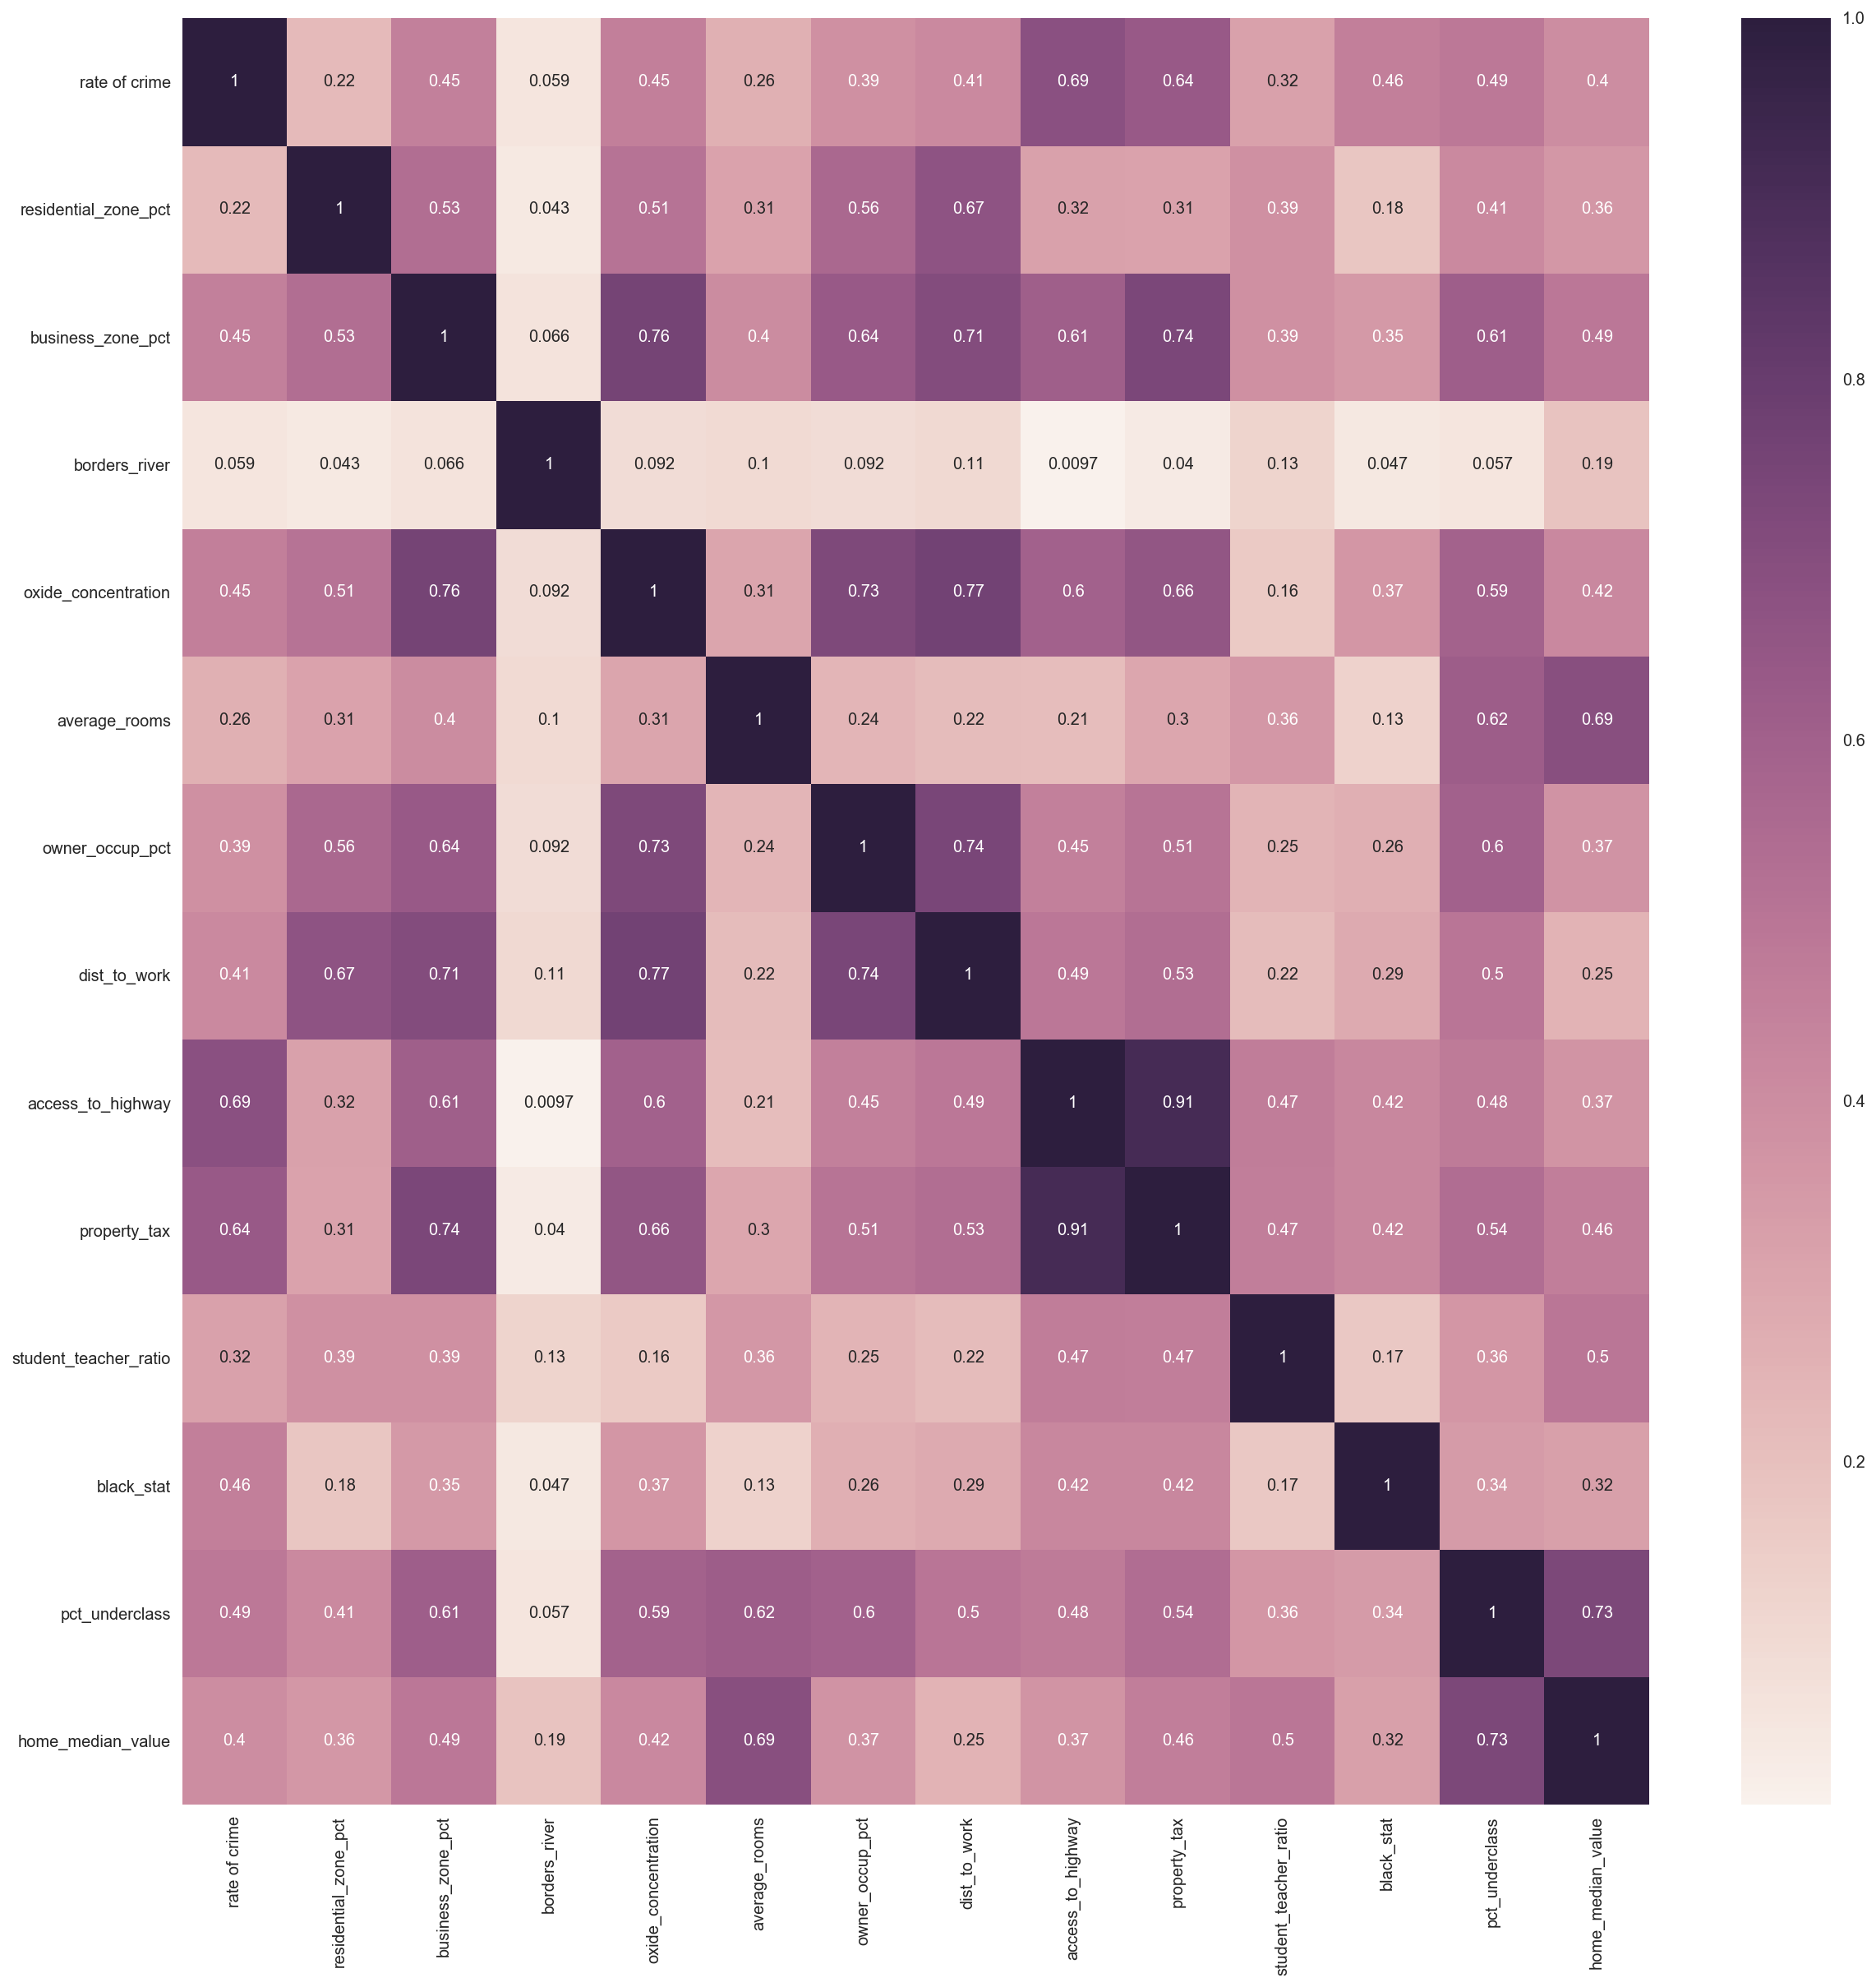

In [70]:
# A:
plt.figure(figsize=(20, 20))
sns.heatmap(np.abs(boston.corr()), annot=True)